In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge

In [5]:
ds=pd.read_csv('abalone.csv')
df=pd.DataFrame(ds)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Change categorical data into values(binary)

In [9]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [11]:
model=KMeans(n_clusters=3)
Age=model.fit_predict(df)
Age

array([2, 0, 1, ..., 1, 1, 1])

In [12]:
Age.shape

(4177,)

In [13]:
df['Age']=pd.DataFrame(data=Age)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   int32  
dtypes: float64(7), int32(2), int64(1)
memory usage: 293.8 KB


In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age                 int32
dtype: object

# Uni-Varient Analysis

In [17]:
col=df.columns
ncol=30
nrow=15

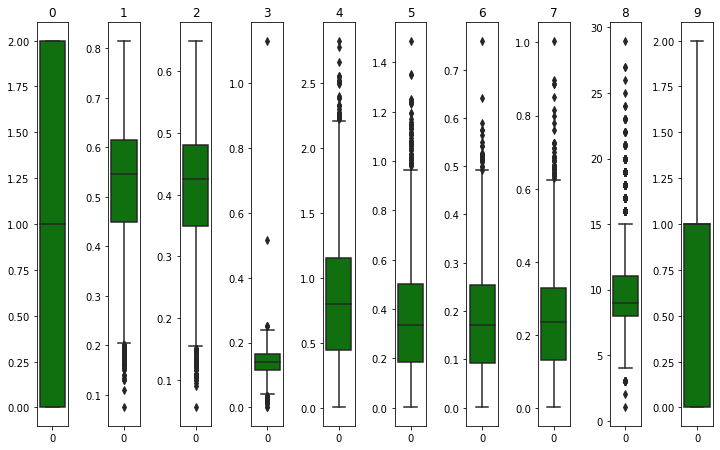

In [18]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.tight_layout()

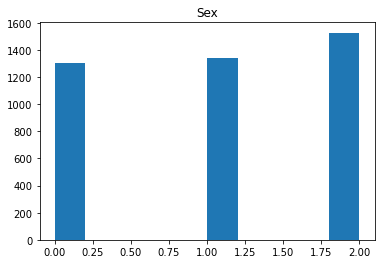

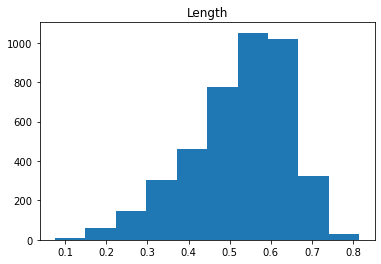

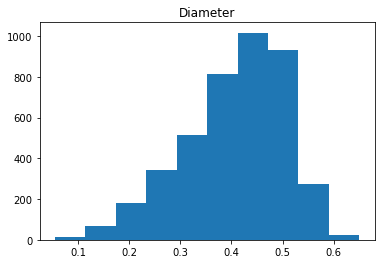

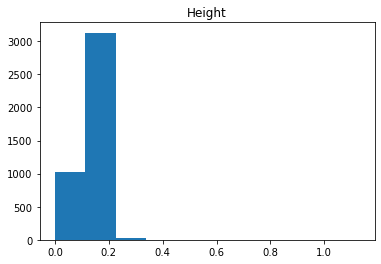

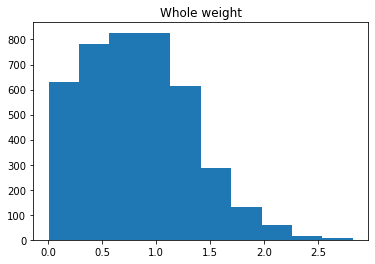

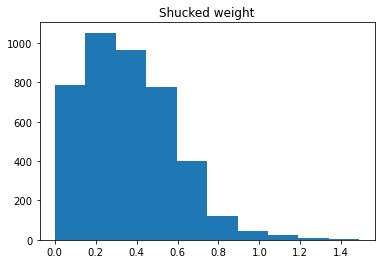

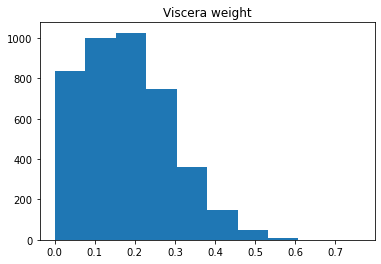

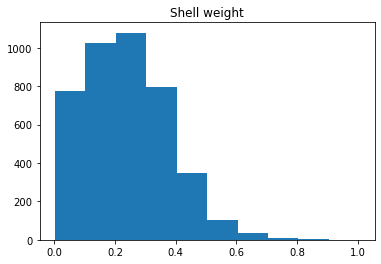

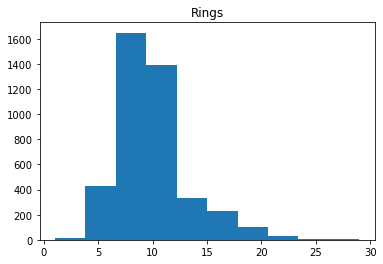

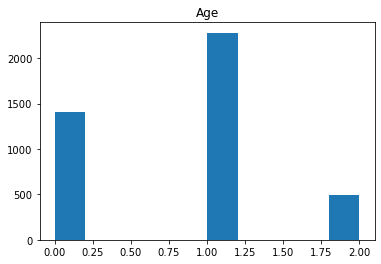

In [19]:
for i in col:
    plt.figure()
    plt.title(i)
    plt.hist(df[i])

# Bi_Verient Analysis

In [20]:
a=df.drop('Age',axis=1)
b=df.Age

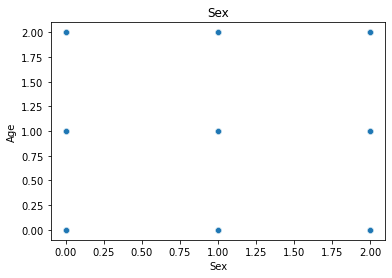

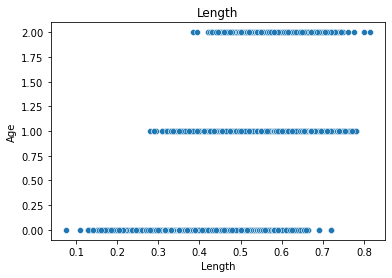

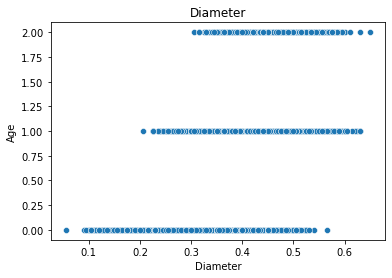

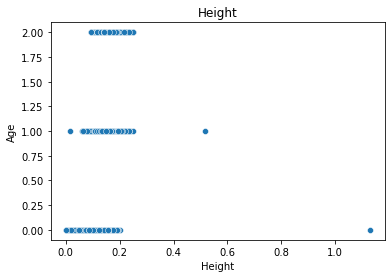

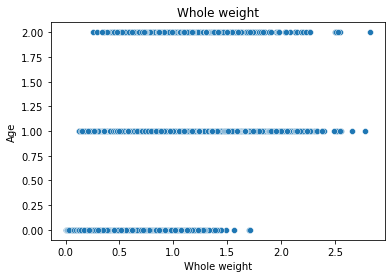

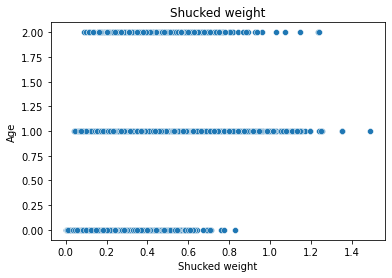

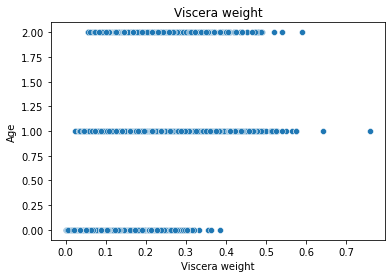

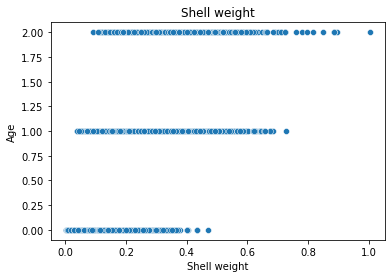

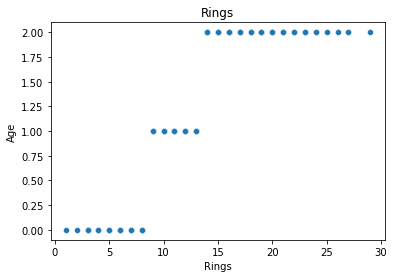

In [21]:
for i in a.columns:
    plt.figure()
    plt.title(i)
    sns.scatterplot(x=df[i],y=b)

# Multiple Analysis

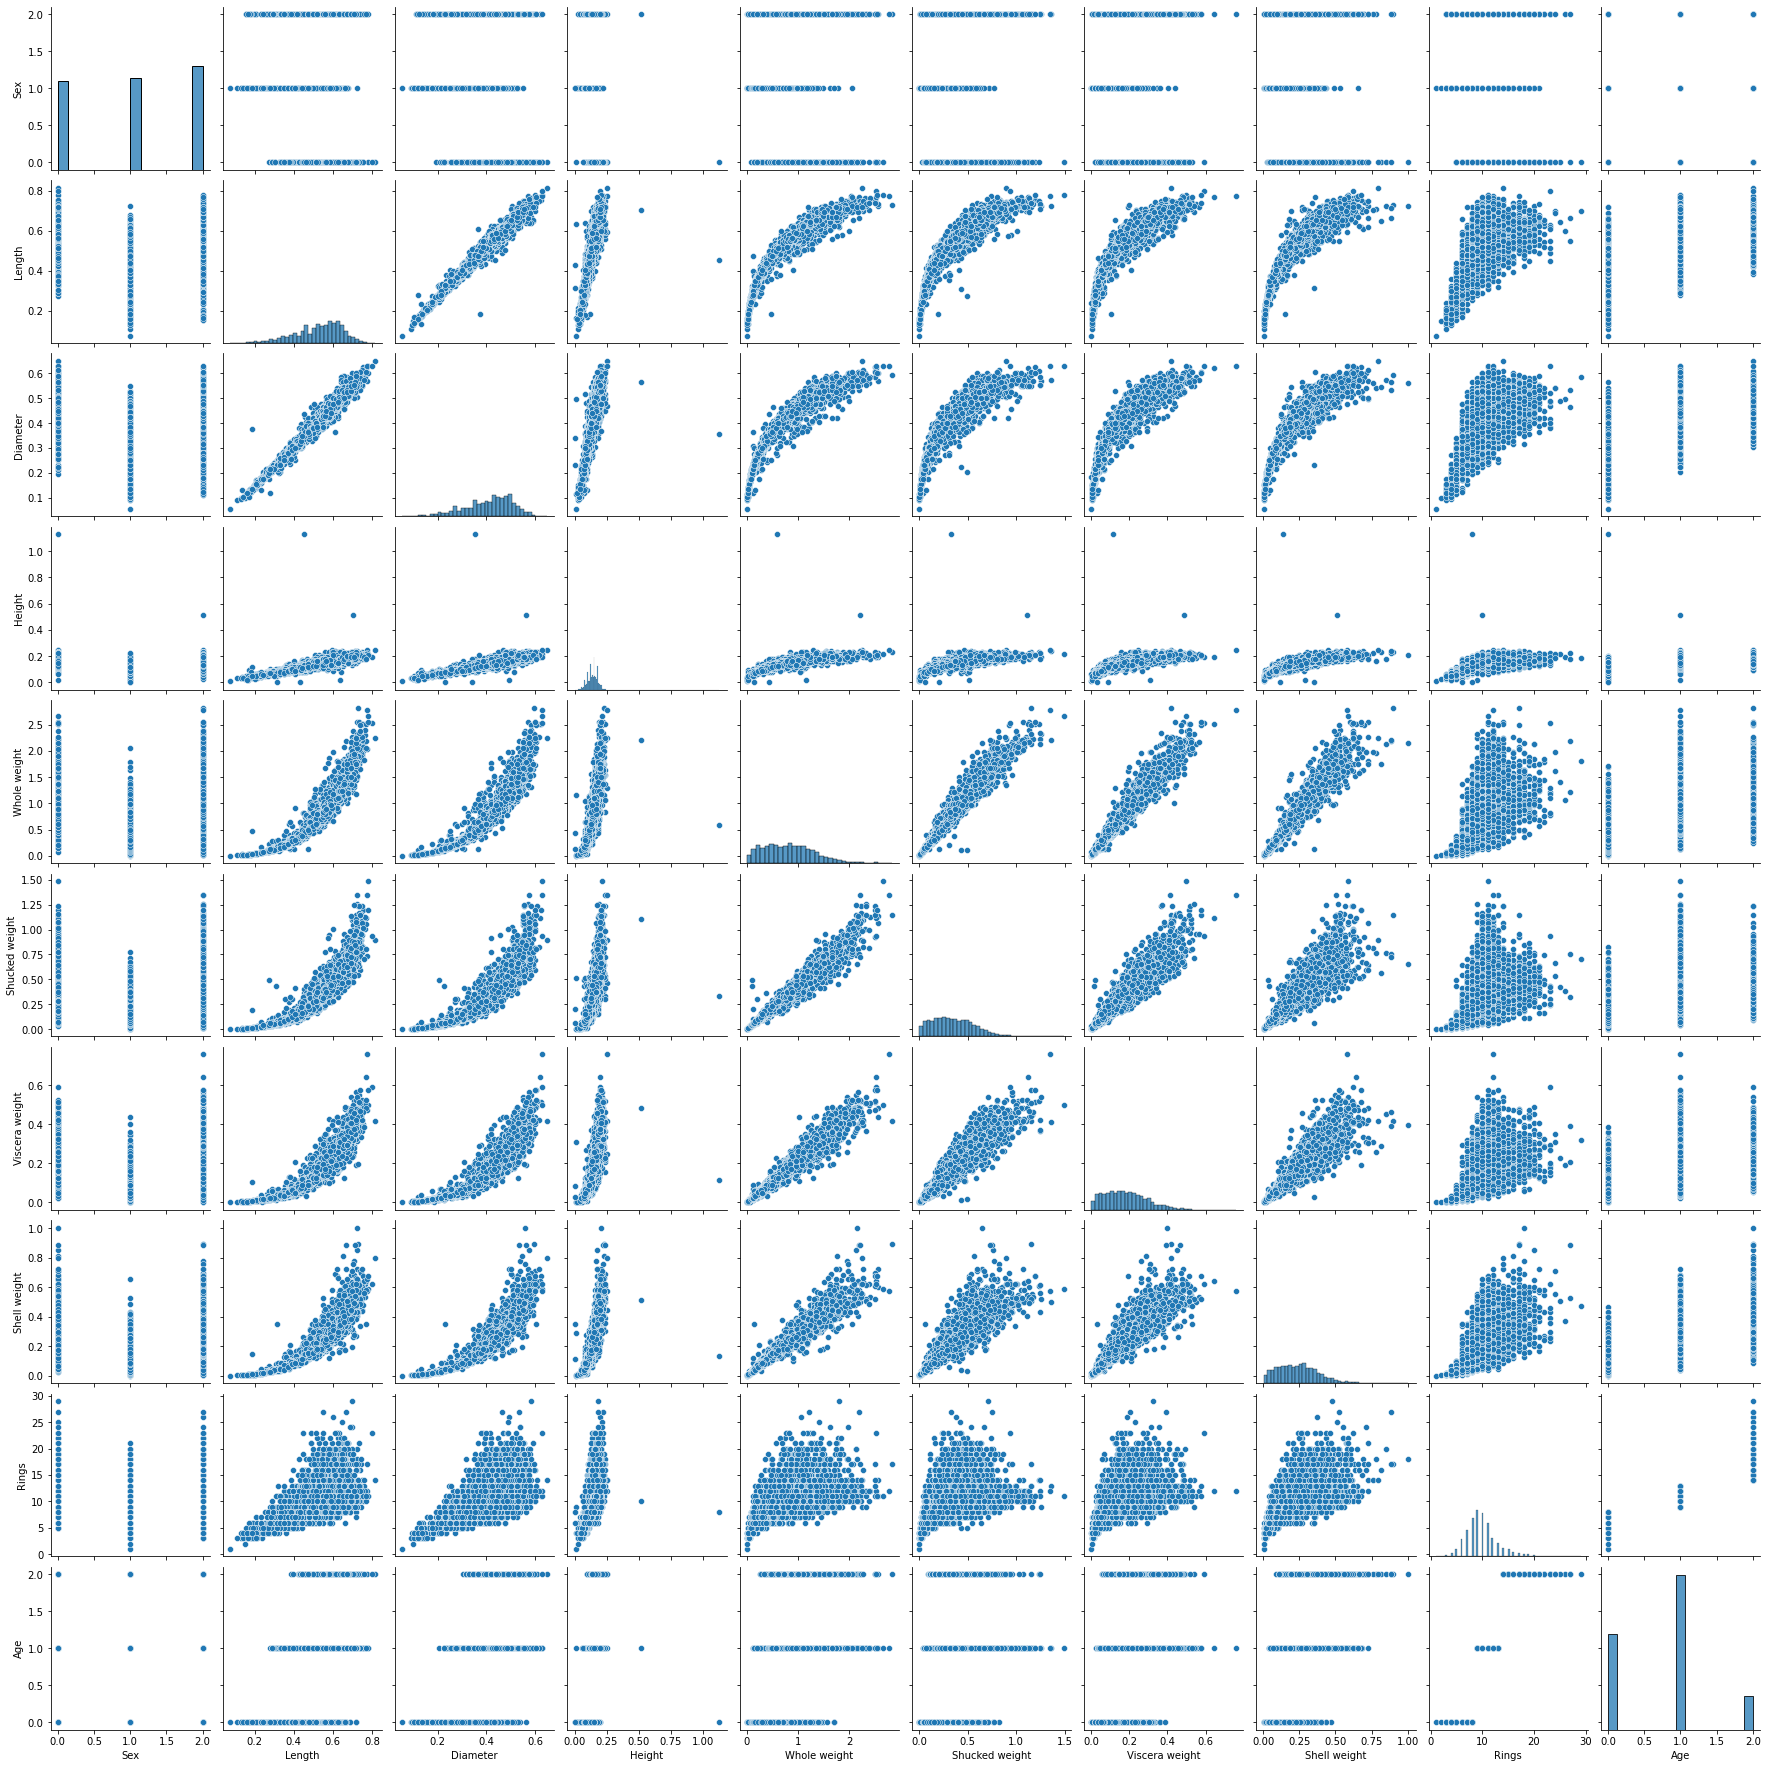

In [22]:
sns.pairplot(df)

# Summary

In [23]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.780464
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.637224
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.000000


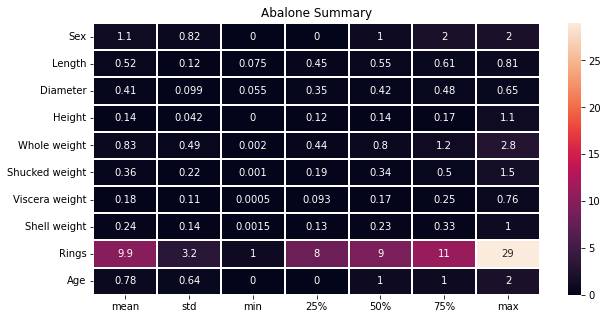

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linewidth=2)
plt.title('Abalone Summary')
plt.savefig('Abalone_heatmap.png')
plt.show()

# To be check correlation

In [25]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.027643
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.552755
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.570058
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.543122
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.543400
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.443848
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.520093
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.610076
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.872899
Age,-0.027643,0.552755,0.570058,0.543122,0.543400,0.443848,0.520093,0.610076,0.872899,1.000000


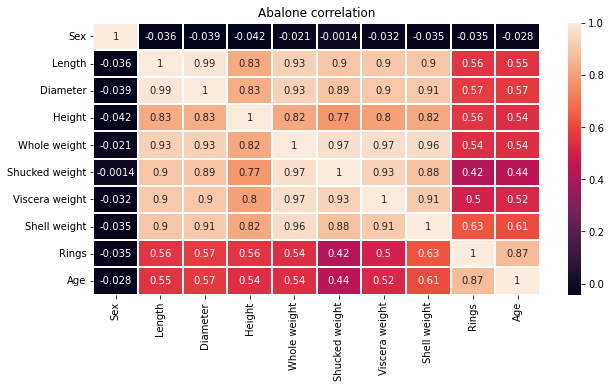

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=2)
plt.title('Abalone correlation')
plt.show()

Sex variable is very weak bond so we drop it.

In [27]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               0.225909
dtype: float64

In [28]:
df.corr()['Age']

Sex              -0.027643
Length            0.552755
Diameter          0.570058
Height            0.543122
Whole weight      0.543400
Shucked weight    0.443848
Viscera weight    0.520093
Shell weight      0.610076
Rings             0.872899
Age               1.000000
Name: Age, dtype: float64

In [29]:
df=df.drop(['Sex'],axis=1)

In [30]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


# Removing Outliers

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [32]:
ds_new=df[(z<3).all(axis=1)]
ds_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


In [33]:
ds.shape

(4177, 10)

In [34]:
ds_new.shape

(4027, 9)

In [35]:
Data_loss=((4177-4027)/4177)*100
Data_loss

3.5910940866650707

# Remove skewness

In [36]:
s=ds_new.drop(['Age'],axis=1)
s

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [37]:
from sklearn.preprocessing import power_transform
a=power_transform(s,method='box-cox')
a

array([[-0.68053896, -0.53372552, -1.1679357 , ..., -0.62655875,
        -0.53552098,  1.6742668 ],
       [-1.43319275, -1.42493955, -1.29229992, ..., -1.33133499,
        -1.3306477 , -0.97535712],
       [-0.0292743 ,  0.05738801, -0.11793266, ..., -0.18937607,
        -0.04325408, -0.16006022],
       ...,
       [ 0.66328436,  0.71816465,  1.90884494, ...,  1.0560495 ,
         0.65988735, -0.16006022],
       [ 0.93034654,  0.84568724,  0.29802409, ...,  0.85508582,
         0.57879657,  0.1982289 ],
       [ 1.91561326,  1.80105228,  1.60680979, ...,  1.67882166,
         1.8023406 ,  0.84236176]])

# Change into same scale

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
st=StandardScaler()
x=st.fit_transform(a)
x

array([[-0.68053896, -0.53372552, -1.1679357 , ..., -0.62655875,
        -0.53552098,  1.6742668 ],
       [-1.43319275, -1.42493955, -1.29229992, ..., -1.33133499,
        -1.3306477 , -0.97535712],
       [-0.0292743 ,  0.05738801, -0.11793266, ..., -0.18937607,
        -0.04325408, -0.16006022],
       ...,
       [ 0.66328436,  0.71816465,  1.90884494, ...,  1.0560495 ,
         0.65988735, -0.16006022],
       [ 0.93034654,  0.84568724,  0.29802409, ...,  0.85508582,
         0.57879657,  0.1982289 ],
       [ 1.91561326,  1.80105228,  1.60680979, ...,  1.67882166,
         1.8023406 ,  0.84236176]])

In [40]:
x.shape

(4027, 8)

In [41]:
y=ds_new['Age']
y.shape

(4027,)

# Apply diffrent model for checking model and data accuracy

In [42]:
li=LogisticRegression()

In [43]:
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    li.fit(x,y)
    pred_train=li.predict(x_train)
    pred_test=li.predict(x_test)
    print(f"At random_state {i} the traning score is: {accuracy_score(y_train,pred_train)}")
    print(f"At random_state {i} the testing score is: {accuracy_score(y_test,pred_test)}")
    print("\n")

At random_state 0 the traning score is: 1.0
At random_state 0 the testing score is: 1.0


At random_state 1 the traning score is: 1.0
At random_state 1 the testing score is: 1.0


At random_state 2 the traning score is: 1.0
At random_state 2 the testing score is: 1.0


At random_state 3 the traning score is: 1.0
At random_state 3 the testing score is: 1.0


At random_state 4 the traning score is: 1.0
At random_state 4 the testing score is: 1.0


At random_state 5 the traning score is: 1.0
At random_state 5 the testing score is: 1.0


At random_state 6 the traning score is: 1.0
At random_state 6 the testing score is: 1.0


At random_state 7 the traning score is: 1.0
At random_state 7 the testing score is: 1.0


At random_state 8 the traning score is: 1.0
At random_state 8 the testing score is: 1.0


At random_state 9 the traning score is: 1.0
At random_state 9 the testing score is: 1.0


At random_state 10 the traning score is: 1.0
At random_state 10 the testing score is: 1.0


At rando

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
li.fit(x,y)
pred_li=li.predict(x_test)
print(f'Mean_absolute_error : {confusion_matrix(y_test,pred_li)}')
print(f"Mean_squared_error : {classification_report(y_test,pred_li)}")
print(f'Model accuracy:{li.score(x_train,y_train)}')
print(f"Accuracy score :{accuracy_score(y_test,pred_li)}")

Mean_absolute_error : [[280   0   0]
 [  0 444   0]
 [  0   0  82]]
Mean_squared_error :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00       444
           2       1.00      1.00      1.00        82

    accuracy                           1.00       806
   macro avg       1.00      1.00      1.00       806
weighted avg       1.00      1.00      1.00       806

Model accuracy:1.0
Accuracy score :1.0


# CROSS VAL SCORE

In [45]:
li=LogisticRegression()
li.fit(x,y)

LogisticRegression()

In [46]:
pre_train=li.predict(x_train)
pre_test=li.predict(x_test)
tra_accuracy=accuracy_score(y_train,pre_train)
tes_accuracy=accuracy_score(y_test,pre_test)
for j in range(2,10):
    cv_score=cross_val_score(li,x,y,cv=j)
    mean_score=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold {j} the mean_score is:{mean_score} and the training accuracy is {tra_accuracy} and the test accuracy is {tes_accuracy}')
    print('\n')

At cross fold 2 the mean_score is:1.0 and the training accuracy is 1.0 and the test accuracy is 1.0


At cross fold 3 the mean_score is:1.0 and the training accuracy is 1.0 and the test accuracy is 1.0


At cross fold 4 the mean_score is:1.0 and the training accuracy is 1.0 and the test accuracy is 1.0


At cross fold 5 the mean_score is:1.0 and the training accuracy is 1.0 and the test accuracy is 1.0


At cross fold 6 the mean_score is:1.0 and the training accuracy is 1.0 and the test accuracy is 1.0


At cross fold 7 the mean_score is:1.0 and the training accuracy is 1.0 and the test accuracy is 1.0


At cross fold 8 the mean_score is:1.0 and the training accuracy is 1.0 and the test accuracy is 1.0


At cross fold 9 the mean_score is:1.0 and the training accuracy is 1.0 and the test accuracy is 1.0




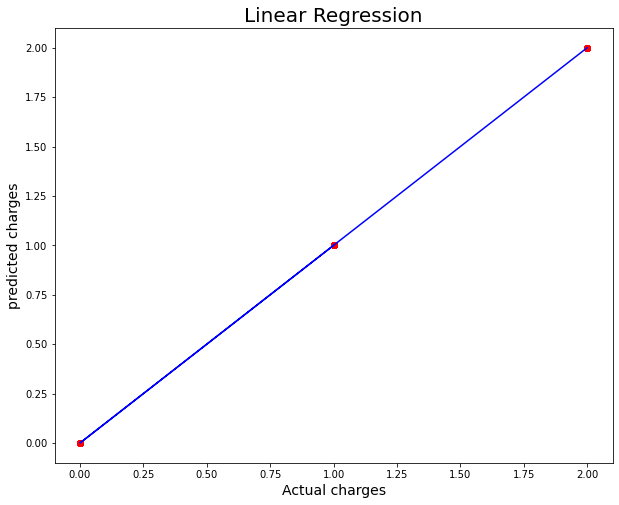

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=pre_test,color='r')
plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=20)
plt.savefig('li.png')
plt.show()

# DECISION TREE REGRESSOR

In [48]:
criterion=['gini','entropy']
for i in criterion:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(x,y)
    pred_dtc=dtc.predict(x_test)
    print(f"The criterion is use:{i}")
    print(f'Mean_absolute_error : {confusion_matrix(y_test,pred_dtc)}')
    print(f"Mean_squared_error : {classification_report(y_test,pred_dtc)}")
    print(f'Model accuracy:{dtc.score(x_train,y_train)}')
    print(f"Accuracy score :{accuracy_score(y_test,pred_dtc)}")  
    print('\n')

The criterion is use:gini
Mean_absolute_error : [[280   0   0]
 [  0 444   0]
 [  0   0  82]]
Mean_squared_error :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00       444
           2       1.00      1.00      1.00        82

    accuracy                           1.00       806
   macro avg       1.00      1.00      1.00       806
weighted avg       1.00      1.00      1.00       806

Model accuracy:1.0
Accuracy score :1.0


The criterion is use:entropy
Mean_absolute_error : [[280   0   0]
 [  0 444   0]
 [  0   0  82]]
Mean_squared_error :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00       444
           2       1.00      1.00      1.00        82

    accuracy                           1.00       806
   macro avg       1.00      1.00      1.00       806
weighted avg       

# KNEIGHBORS REGREESOR

In [49]:
kn=KNeighborsClassifier()
kn.fit(x,y)
pred_kn=kn.predict(x_test)
print(f'Mean_absolute_error : {confusion_matrix(y_test,pred_kn)}')
print(f"Mean_squared_error : {classification_report(y_test,pred_kn)}")
print(f'Model accuracy:{kn.score(x_train,y_train)}')
print(f"Accuracy score :{accuracy_score(y_test,pred_kn)}")  

Mean_absolute_error : [[277   3   0]
 [  2 441   1]
 [  0   3  79]]
Mean_squared_error :               precision    recall  f1-score   support

           0       0.99      0.99      0.99       280
           1       0.99      0.99      0.99       444
           2       0.99      0.96      0.98        82

    accuracy                           0.99       806
   macro avg       0.99      0.98      0.99       806
weighted avg       0.99      0.99      0.99       806

Model accuracy:0.9913070475007761
Accuracy score :0.988833746898263


# SUPPORT VECTOR REGRESSOR

In [50]:
kernellist=['rbf','poly','linear']
for i in kernellist:
    sv=SVC(kernel=i)
    sv.fit(x_train,y_train)
    pred_sv=sv.predict(x_test)
    print(f"The kernel is use:{i}")
    print(f'Mean_absolute_error : {confusion_matrix(y_test,pred_sv)}')
    print(f"Mean_squared_error : {classification_report(y_test,pred_sv)}")
    print(f'Model accuracy:{sv.score(x_train,y_train)}')
    print(f"Accuracy score :{accuracy_score(y_test,pred_sv)}")  
    print('\n')
    

The kernel is use:rbf
Mean_absolute_error : [[280   0   0]
 [  0 444   0]
 [  0   5  77]]
Mean_squared_error :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.99      1.00      0.99       444
           2       1.00      0.94      0.97        82

    accuracy                           0.99       806
   macro avg       1.00      0.98      0.99       806
weighted avg       0.99      0.99      0.99       806

Model accuracy:0.9981372244644521
Accuracy score :0.9937965260545906


The kernel is use:poly
Mean_absolute_error : [[189  91   0]
 [ 11 433   0]
 [  0  16  66]]
Mean_squared_error :               precision    recall  f1-score   support

           0       0.94      0.68      0.79       280
           1       0.80      0.98      0.88       444
           2       1.00      0.80      0.89        82

    accuracy                           0.85       806
   macro avg       0.92      0.82      0.85       806

# Test data with best model

In [51]:
def test_data(d):
    d=d.reshape(1,-1)
    print('d shape is:',d.shape)
    Test_value=dtc.predict(d)
    print('Test_value:',Test_value)
    

In [52]:
d=np.array([0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15])
test_data(d)

d shape is: (1, 8)
Test_value: [2]
